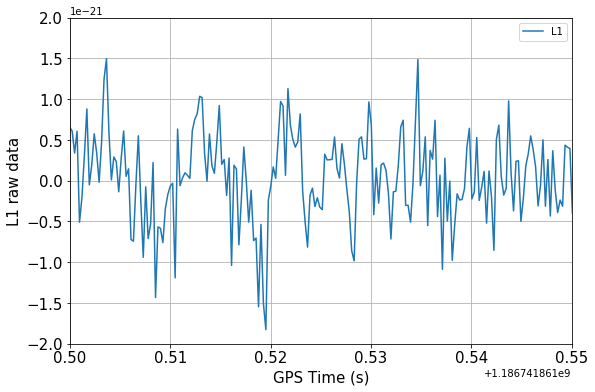

In [20]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
X0 = []
X = []
for ifo in ['L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170814").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)
        # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()*10**-23

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-23
    
    # time shift and flip L1
#    if ifo == 'L1':
#        smooth *= -1
#        smooth.roll(int(.007 / smooth.delta_t))

    fig= plt.figure(figsize=(9,6))
    pylab.plot(white_strain.sample_times, white_strain, label=ifo)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
pylab.legend()
pylab.xlim(1186741861.50, 1186741861.55)
pylab.ylim(-0.2*10**-20, 0.2*10**-20)
pylab.ylabel('L1 raw data', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

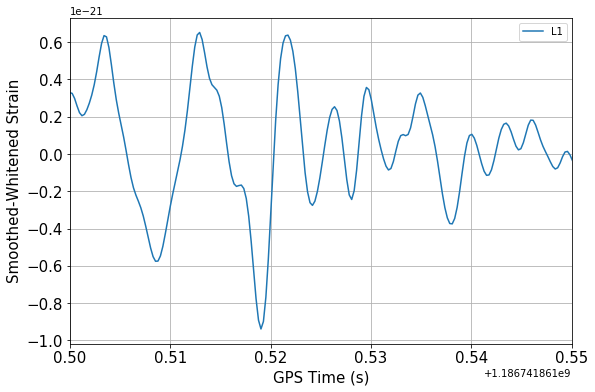

In [23]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
import matplotlib.pyplot as plt
X0 = []
X = []
for ifo in ['L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170814").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)
        # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)
    smooth = smooth[131072*10/30:131072*20/30]*10**-23
    
    # time shift and flip L1
#    if ifo == 'L1':
#        smooth *= -1
#        smooth.roll(int(.007 / smooth.delta_t))

    fig= plt.figure(figsize=(9,6))
    pylab.plot(smooth.sample_times, smooth, label=ifo)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
pylab.legend()
pylab.xlim(1186741861.50, 1186741861.55)
#pylab.ylim(-150, 150)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()

[1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09 1.18674186e+09 1.18674186e+09 1.18674186e+09
 1.18674186e+09]
[-5.04363277e-22 -5.50513178e-22 -5.75392874e-22 -5.74536529e-22
 -5.46649975e-22 -4.94967676e-22 -4.26960660e-22 -3.52908840e-22
 -2.81377824e-22 -2.15390978e-22 -1.54260452e-22 -9.42796522e-23
 -2.99612280e-23  4.24562285e-23  1.28815566e-22  2.32917437e-22
  3.50966498e-22  4.71087372e-22  5.74088655e-22  6.39091085e-22
  6.52389823e-22  6.14694191e-22  5.44498926e-22

Text(0.5,0,'Time(s)')

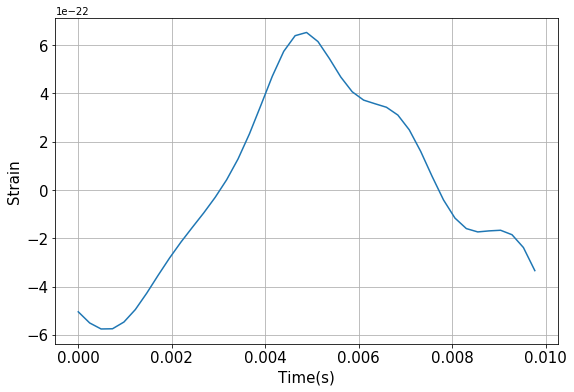

In [24]:
import numpy as np
array_smooth = np.array(smooth)
list_smooth = array_smooth.tolist()
max_index = list_smooth.index(max(array_smooth))
print(smooth.sample_times[19851-20:19851+21])
print(smooth[19851-20:19851+21])
fig= plt.figure(figsize=(9,6))
plt.plot(smooth.sample_times[19851-20:19851+21]-smooth.sample_times[19851-20], smooth[19851-20:19851+21])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

pylab.ylabel('Strain', fontsize=15)
pylab.grid()
pylab.xlabel('Time(s)', fontsize=15)

Text(0.5,0,'Time(s)')

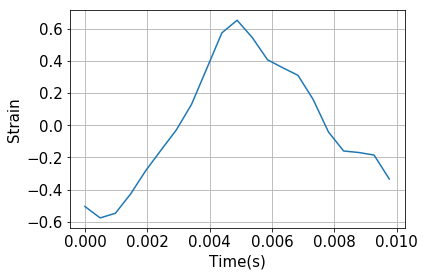

In [18]:
ttemp = smooth.sample_times[19851-20:19851+23] - smooth.sample_times[19851-20]
htemp = smooth[19851-20:19851+23]
t = []
h = []
for i in range(len(ttemp)/2):
    t.append(ttemp[2*i])
for i in range(len(htemp)/2):
    h.append(htemp[2*i]/100)
plt.plot(t,h)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

pylab.ylabel('Strain', fontsize=15)
pylab.grid()
pylab.xlabel('Time(s)', fontsize=15)

Text(0.5,0,'Time(s)')

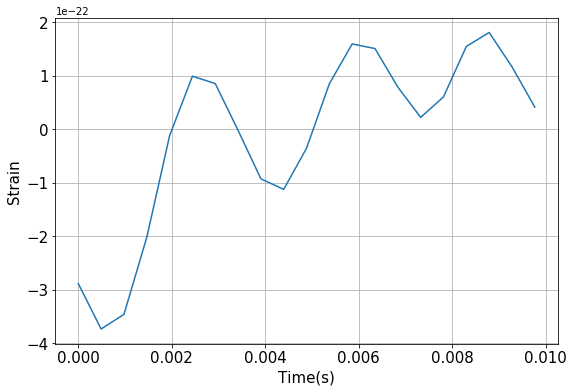

In [26]:
ntemp = smooth[19851+100:19851+143]
ttemp1 = smooth.sample_times[19851+100:19851+143]
n = []
for i in range(len(ntemp)/2):
    n.append(ntemp[2*i])
fig= plt.figure(figsize=(9,6))
plt.plot(t,n)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

pylab.ylabel('Strain', fontsize=15)
pylab.grid()
pylab.xlabel('Time(s)', fontsize=15)

In [21]:
X0 = []
X1 = []
X = []


X0.append([t,h])
X1.append([t,n])

X.append(X0)
X.append(X1)
X = np.array(X)
print(X.shape)
np.save('X_detection_real.npy', X)

(2, 1, 2, 21)


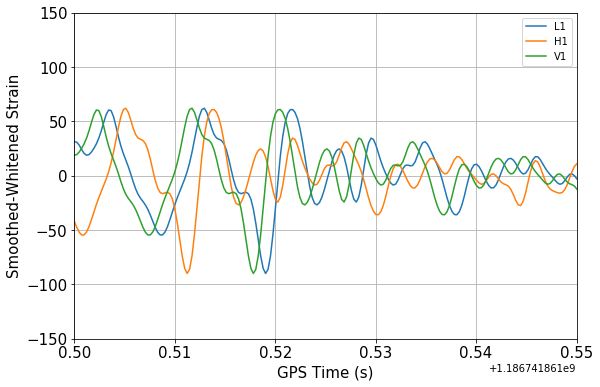

In [22]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab
fig= plt.figure(figsize=(9,6))

for ifo in ['L1','H1','V1']:
    # Read data and remove low frequency content
    l1 = Merger("GW170814").strain(ifo)
    l1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (l1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)

    # time shift and flip L1
    if ifo == 'H1':
        smooth.roll(int(-0.008 / smooth.delta_t))
    if ifo == 'V1':
        smooth.roll(int(-0.014 / smooth.delta_t))
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend()
pylab.xlim(1186741861.50, 1186741861.55)
pylab.ylim(-150, 150)
pylab.ylabel('Smoothed-Whitened Strain', fontsize=15)
pylab.grid()
pylab.xlabel('GPS Time (s)', fontsize=15)
pylab.show()